In [ ]:
import networkx as nx
from collections import deque
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

Изначальные задачи:


1) В связи с этими мостами был поставлен вопрос, можно ли совершить по ним прогулку так, чтобы пройти по каждому из этих мостов, причём ровно по одному разу.

2) Задача состояла в следующем, найти маршрут прохождения всех четырёх частей суши, который начинался бы с любой из них, кончался бы на этой же части и ровно один раз проходил по каждому мосту.

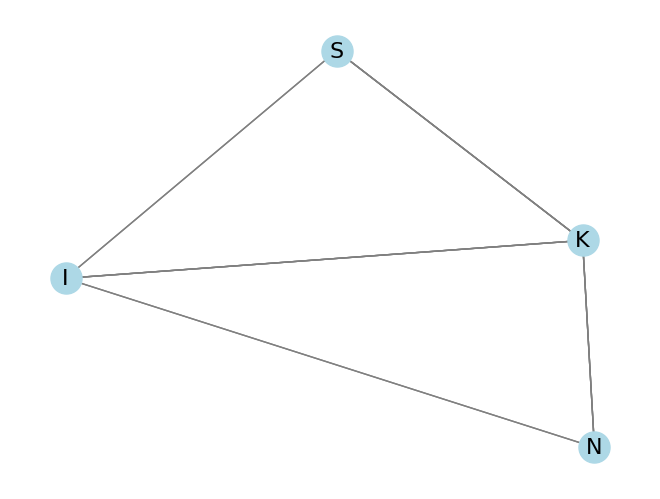

In [ ]:
konigsberg_bridges = {
    'N': ['K', 'K', 'I'],  # Северная часть
    'S': ['K', 'K', 'I'],  # Южная часть
    'K': ['N', 'N', 'S', 'S', 'I', 'I'],  # Остров Кнайпхоф
    'I': ['K', 'K', 'N', 'S']  # Восточный берег
}

G_konigsberg = nx.MultiGraph()
for land, bridges in konigsberg_bridges.items():
    for bridge in bridges:
        G_konigsberg.add_edge(land, bridge)

pos = nx.spring_layout(G_konigsberg)
nx.draw(G_konigsberg, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, edge_color='gray')


Математическая теория (кратко)

первая теорема Эйлера, 1736. Граф с двумя или более вершинами имеет эйлеров цикл тогда и только тогда, когда в каждую вершину входит чётное число рёбер;

вторая теорема Эйлера, 1736. Граф с двумя или более вершинами имеет единственную эйлерову цепь тогда и только тогда, когда ровно в две вершины входит нечётное число рёбер.

Реализация первой функции с помощью dfs и bfs, она ищет путь эйлера (решает задачу первой теоремы)

In [ ]:
def find_eulerian_path_dfs(graph):
    def is_connected(graph):
        start_vertex = next(iter(graph))
        visited = set()
        stack = [start_vertex]
        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                stack.extend(graph[vertex] - visited)
        return len(visited) == len([v for v in graph if graph[v]])

    if not is_connected(graph):
        return "Эйлеров путь отсутствует"

    odd_degree_vertices = [v for v in graph if len(graph[v]) % 2 != 0]
    if len(odd_degree_vertices) > 2:
        return "Эйлеров путь отсутствует"

    stack = []
    path = []

    if odd_degree_vertices:
        start_vertex = odd_degree_vertices[0]
    else:
        start_vertex = next(iter(graph))

    stack.append(start_vertex)
    while stack:
        v = stack[-1]
        if graph[v]:
            u = graph[v].pop()
            stack.append(u)
            graph[u].remove(v)
        else:
            path.append(stack.pop())

    return path[::-1]

In [ ]:
def find_eulerian_path_bfs(graph):
    def is_connected(graph):
      if not is_connected(graph):
        return "Эйлеров путь отсутствует"

    odd_degree_vertices = [v for v in graph if len(graph[v]) % 2 != 0]
    if len(odd_degree_vertices) > 2:
        return "Эйлеров путь отсутствует"

    path = []
    queue = deque()

    start_vertex = odd_degree_vertices[0] if odd_degree_vertices else next(iter(graph))
    queue.append(start_vertex)

    while queue:
        v = queue.popleft()
        while graph[v]:
            u = graph[v].pop()
            if u in graph:
                graph[u].remove(v)
                queue.append(u)
            path.append((v, u))
            v = u

    return [edge[0] for edge in path] + [path[-1][1]]

graph = {'A': {'B', 'F'},
         'B': {'A', 'C', 'F'},
         'C': {'B', 'D'},
         'D': {'C', 'E'},
         'E': {'D', 'F'},
         'F': {'A', 'B', 'E'}}
print(find_eulerian_path_bfs(graph))


['B', 'F', 'A', 'B', 'C', 'D', 'E', 'F']


Внизу тестовые графы

Функция принимает как числовой словарь, так и буквеный (где ключ это вершина, а итем это ребро)

граф 1 и 2 имеют пути (можно убедиться на рисунках дальше + по теореме)
граф 3 не имеет пути

In [ ]:
graph1 = {
    1: {2, 3},
    2: {1, 4, 5},
    3: {1, 6},
    4: {2, 5},
    5: {2, 4, 6},
    6: {3, 5}
}
graph2 = {
    1: {2, 3},
    2: {1, 4},
    3: {1, 4},
    4: {2, 3, 5},
    5: {4}
}
graph3 = {
    'A': {'B'},
    'B': {'A', 'C'},
    'C': {'B', 'D', 'E'},
    'D': {'C'},
    'E': {'C'}
}
# find_eulerian_path_dfs(graph1)
# find_eulerian_path_bfs(graph1)

функцию использовать только в единичном экземпляре, тк она удаляет рёбра в графе (2 раза подряд вызывать не получится)

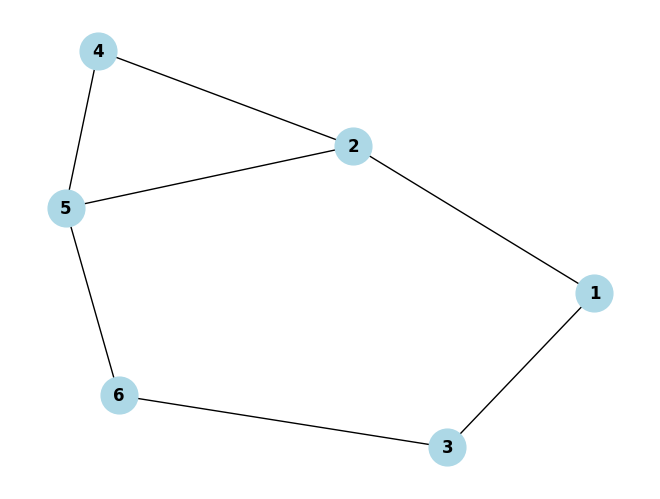

In [ ]:
graph1_numerical = {
    1: {2, 3},
    2: {1, 4, 5},
    3: {1, 6},
    4: {2, 5},
    5: {2, 4, 6},
    6: {3, 5}
}
G1_numerical = nx.Graph(graph1_numerical)
nx.draw(G1_numerical, with_labels=True, font_weight='bold', node_color='lightblue', node_size=700)

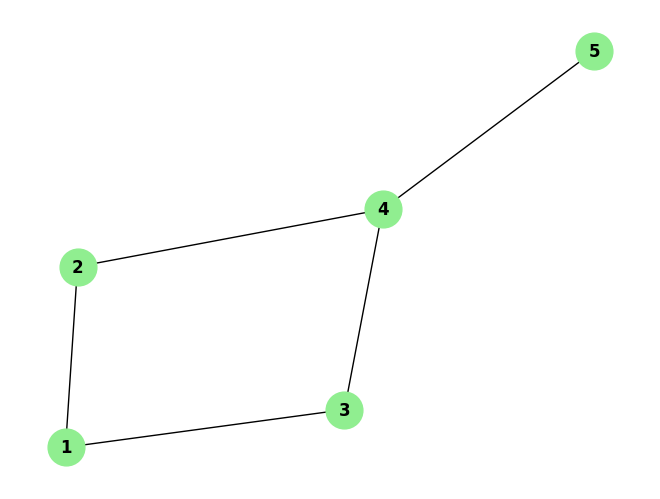

In [ ]:
graph2_numerical = {
    1: {2, 3},
    2: {1, 4},
    3: {1, 4},
    4: {2, 3, 5},
    5: {4}
}
G2_numerical = nx.Graph(graph2_numerical)
nx.draw(G2_numerical, with_labels=True, font_weight='bold', node_color='lightgreen', node_size=700)


Функция для поиска цикла Эйлера реализованная с dfs и bfs. (Решает задачу второй теоремы)

In [ ]:
def find_eulerian_cycle_dfs(graph):
    for neighbors in graph.values():
        if len(neighbors) % 2 != 0:
            return "Цикла Эйлера не существует"

    stack = []
    path = []
    start_vertex = list(graph.keys())[0]

    stack.append(start_vertex)
    while stack:
        v = stack[-1]
        if graph[v]:
            u = graph[v].pop()
            stack.append(u)
            graph[u].remove(v)
        else:
            path.append(stack.pop())

    return path

graph = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1, 3],
    3: [2]
}
eulerian_cycle = find_eulerian_cycle_dfs(graph)
eulerian_cycle


'Цикла Эйлера не существует'

In [ ]:
def find_eulerian_cycle_bfs(graph):
    for neighbors in graph.values():
        if len(neighbors) % 2 != 0:
            return "Цикла Эйлера не существует"

    path = []
    queue = deque()
    start_vertex = next(iter(graph))

    queue.append(start_vertex)
    while queue:
        v = queue.popleft()
        while graph[v]:
            u = graph[v].pop()
            if u in graph:
                graph[u].remove(v)
                queue.append(u)
            path.append((v, u))
            v = u

    return [edge[0] for edge in path] + [path[-1][1]]

graph = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1, 3],
    3: [2]
}
eulerian_cycle = find_eulerian_cycle_bfs(graph)
print(eulerian_cycle)

Цикла Эйлера не существует


Ниже примеры графов для которых путь существует (по теореме и на графиках видно)

In [ ]:
full_graph = {
    1: [3, 2],
    2: [1, 3, 4, 5],
    3: [1, 2, 4, 5],
    4: [3, 2],
    5: [2, 3]
}
full_graph1 = {
    1: [6,5,3,2],
    2: [1,6,4,3],
    3: [1,2,4,5],
    4: [3,2,6,5],
    5: [4,6,1,3],
    6: [1,5,4,2]
}
find_eulerian_cycle_bfs(full_graph)

[1, 2, 5, 3, 4, 2, 3, 1]

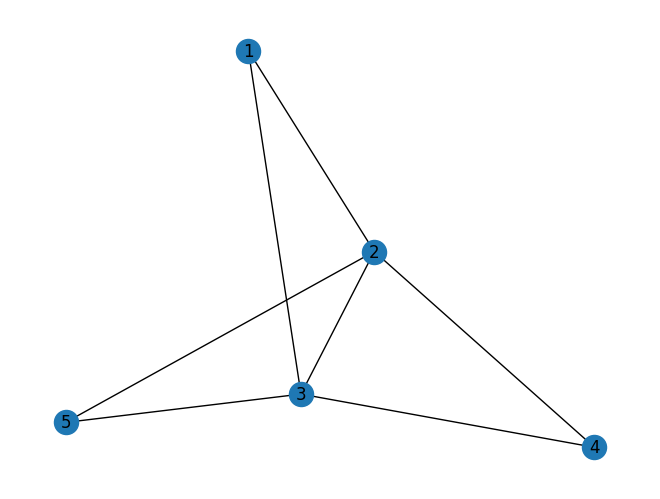

In [ ]:
euler_graph = {
    1: [3, 2],
    2: [1, 3, 4, 5],
    3: [1, 2, 4, 5],
    4: [3, 2],
    5: [2, 3]
}
G_full = nx.Graph(euler_graph)
for node, neighbors in full_graph.items():
    for neighbor in neighbors:
        G_full.add_edge(node, neighbor)
nx.draw(G_full, with_labels=True)

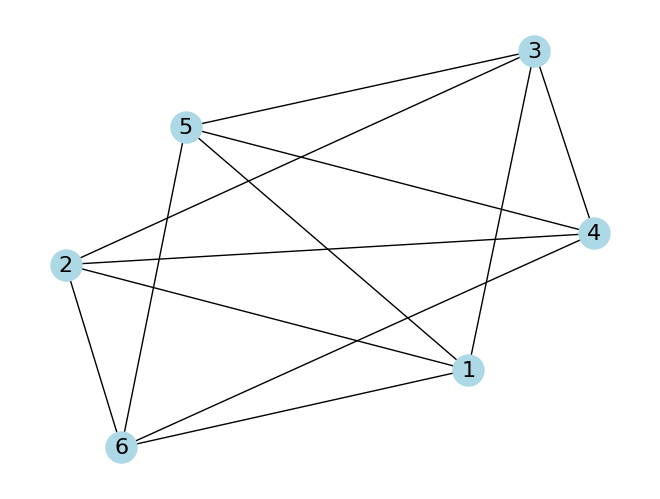

In [ ]:
full_graph1 = {
    1: [6, 5, 3, 2],
    2: [1, 6, 4, 3],
    3: [1, 2, 4, 5],
    4: [3, 2, 6, 5],
    5: [4, 6, 1, 3],
    6: [1, 5, 4, 2]
}
G_full1 = nx.Graph()
for node, neighbors in full_graph1.items():
    for neighbor in neighbors:
        G_full1.add_edge(node, neighbor)
nx.draw(G_full1, with_labels=True, node_color='lightblue', node_size=500, font_size=16)


Функция которая делает гифку-пример нахождения цикла эйлера

In [ ]:
G = nx.Graph()
edges = [(1, 3), (1, 2), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5)]
G.add_edges_from(edges)

euler_path = [1, 3, 2, 4, 3, 5, 2, 1]

path_edges = [(euler_path[i], euler_path[i + 1]) for i in range(len(euler_path) - 1)]

fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=800)

def update(num, pos, path_edges, ax):
    if num < len(path_edges):
        edge = path_edges[num]
        ax.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], lw=2, color='red')
    return ax

ani = animation.FuncAnimation(fig, update, frames=len(path_edges), fargs=(pos, path_edges, ax), interval=1000, blit=False)

ani.save('euler_path_animation.gif', writer='pillow')

plt.close()


Создаёт граф числовой и буквенный для сириуса с вершинами (Сигма, ПНИИ, Утро,Пятерочка), находит путь Эйлера

In [ ]:
sirius = {
    'PNII': {'Pyaterochka','Cafe utro','Sigma Sirius'},
    'Pyaterochka': {'PNII','Sigma Sirius'},
    'Cafe utro': {'PNII','Sigma Sirius'},
    'Sigma Sirius': {'PNII', 'Pyaterochka', 'Cafe utro'},
}
euler_sirius = {
    1: {2,3,4},
    2: {1,4},
    3: {1,4},
    4: {1,2,3},
}
find_eulerian_path_dfs(sirius)

['PNII', 'Pyaterochka', 'Sigma Sirius', 'Cafe utro', 'PNII', 'Sigma Sirius']

Адаптация на русский язык и демонстрация визуализации

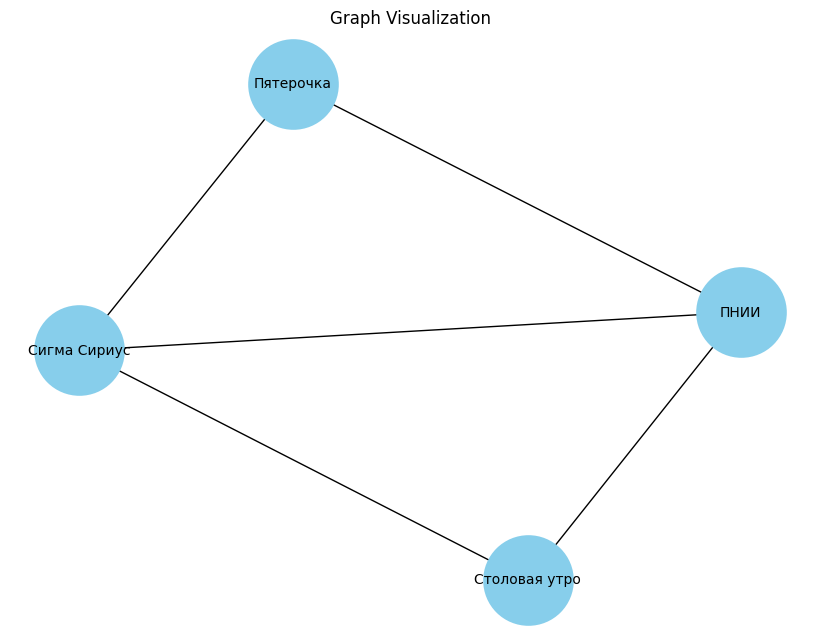

In [ ]:
sirius = {
    'ПНИИ': {'Пятерочка', 'Столовая утро', 'Сигма Сириус'},
    'Пятерочка': {'ПНИИ', 'Сигма Сириус'},
    'Столовая утро': {'ПНИИ', 'Сигма Сириус'},
    'Сигма Сириус': {'ПНИИ', 'Пятерочка', 'Столовая утро'},
}

G = nx.Graph()
for node, neighbors in sirius.items():
    G.add_node(node)
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4000, edge_color='black', linewidths=2, font_size=10)
plt.title("Graph Visualization")
plt.show()

Создание гифки с путём Эйлера для Сириуса

In [ ]:
G_sirius = nx.Graph()
edges_sirius = [('ПНИИ', 'Пятерочка'), ('ПНИИ', 'Столовая утро'), ('ПНИИ', 'Сигма Сириус'),
                ('Пятерочка', 'Сигма Сириус'), ('Столовая утро', 'Сигма Сириус')]

G_sirius.add_edges_from(edges_sirius)

euler_path_sirius = ['Сигма Сириус', 'Столовая утро', 'ПНИИ', 'Сигма Сириус', 'Пятерочка', 'ПНИИ']

path_edges_sirius = [(euler_path_sirius[i], euler_path_sirius[i + 1]) for i in range(len(euler_path_sirius) - 1)]

fig_sirius, ax_sirius = plt.subplots(figsize=(8, 6))
pos_sirius = nx.spring_layout(G_sirius)
nx.draw_networkx(G_sirius, pos_sirius, with_labels=True, node_color='lightblue', node_size=3000,font_size=10)

def update_sirius(num, pos, path_edges, ax):
    if num < len(path_edges):
        edge = path_edges[num]
        ax.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], lw=2, color='red')
    return ax

ani_sirius = animation.FuncAnimation(fig_sirius, update_sirius, frames=len(path_edges_sirius), fargs=(pos_sirius, path_edges_sirius, ax_sirius), interval=1000, blit=False)
gif_path_sirius = './sirius_euler_path_animation.gif'
ani_sirius.save(gif_path_sirius, writer='pillow')
plt.close()
gif_path_sirius

'./sirius_euler_path_animation.gif'

Для открытия гифок, нажмите на папку с файлами слева, там будет 2 гифки с графами.